In [1]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = open("../other/books_clean_small.txt", encoding='utf-8').read().strip()
lines = data.split('\n')

In [3]:
len(lines)

1450099

In [4]:
vocab = Counter()
for l in lines:
    for w in l.split():
        vocab[w] += 1

In [5]:
len(vocab)

42589

In [6]:
freq_vocab = vocab.most_common()

In [7]:
freq_cntr = Counter()
for w in freq_vocab:
    freq_cntr[w[1]] += 1

In [8]:
xy = np.array(sorted(freq_cntr.most_common()))

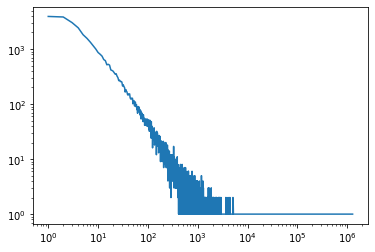

In [9]:
plt.loglog(xy[:, 0], xy[:, 1])

In [10]:
lowfreq_vocab = []
for word, freq in freq_vocab[::-1]:
    if freq > 20: break
    lowfreq_vocab.append(word)

In [11]:
len(lowfreq_vocab)

26451

In [12]:
lowfreq_vocab = set(lowfreq_vocab)

In [13]:
j = 0
for i, l in enumerate(lines):
    curr_unks = lowfreq_vocab.intersection(set(l.split()))
    if curr_unks:
        lines[i] = None
        j+=1
j

150396

In [14]:
lines = list(filter(None, lines))
len(lines)

1299703

In [17]:
data = "\n".join(lines)
f = open("../other/books_clean_small2.txt", 'w')
f.write(data)
f.close()